# BUSINESS DECISION RESEARCH PROJECT

Run By Python

##### Step 1 (Importing Data) :

1. Import The Library
2. Import The Dataset 
3. Show the 5 top data using .head() function
4. Show the columns info in dataset using .info() function

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

df = pd.read_csv("C:/Users/User/business_decision_research/data_retail.csv", sep = ';')

print('Lima Data Teratas')
df.head()

In [246]:
print('Info Dataset')
df.info()

Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


##### Step 2 (Data Cleansing):

1. Convert two columns (First and Last Transaction) into datetime, to simplify the data calculations for the next steps
2. Show the dataset with .head() and .info() to make sure the columns are converted into right format

In [247]:
df['First_Transaction'] = pd.to_datetime(df['First_Transaction'] / 1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction'] / 1000, unit='s', origin='1970-01-01')

df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB


##### Step 3 (Deciding Churn Customers)

###### What is Churn Customers?

Churn Customers is the percentage of customers that stopped using the products or services in several range of time.

To check the churn customers, find the last transactions in the columns, then classify them into two conditions (Churn or Not Churn) using is_churn function

And the result will displayed in Boolean format (True or False)

In [249]:
print(max(df['Last_Transaction']))

df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

print('Lima Data Teratas')
df.head()

2019-02-01 23:57:57.286000128
Lima Data Teratas


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


In [250]:
df['is_churn']

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996     True
99997     True
99998     True
99999    False
Name: is_churn, Length: 100000, dtype: object

To make the data easier to read, we can convert the boolean value into numerical form using Label Encoder.

###### What is Label Encoder?

Label Encoder is the Python library from 'scikit-learn' that has a function to convert evert categorical or string data into numerical form.

In [251]:
LE = LabelEncoder()
df['is_churn'] = LE.fit_transform(df['is_churn'])
print(LE.classes_)
print(np.sort(df['is_churn'].unique()))
print('')

df['is_churn']

[False True]
[0 1]



0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    0
Name: is_churn, Length: 100000, dtype: int32

The next step in Data Cleansing sections is removing every unnecessary columns. In this case, 'no' and 'Row_Num' didn't give a significant role in this project. So we can remove it using del function.

In [252]:
df = df.drop(columns=['no','Row_Num'])
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,0
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,0
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,0
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,0
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,0


##### Step 4 (Data Visualizations) :

For the first visualizations, we decided to show the trend of customer acquisition by year using bar chart. 

In this case, we take the year from 'First_Transaction' and 'Customer_ID' as the parameters for this chart. As we can see, this bar chart shows us the number of customers that hooked to out products or services per year.

All of visualizations is made by matplotlib library, which is the Python Library for Data Visualizations.

And for the results, the highest amounts of customer that hooked to our product is from 2017, and the lowest is from 2013.

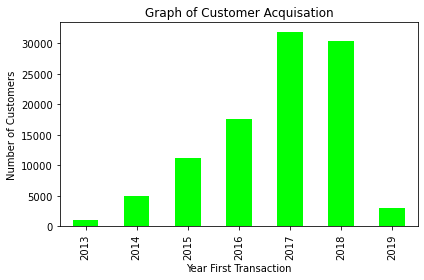

In [253]:
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x= 'Year_First_Transaction', y= 'Customer_ID', kind= 'bar', title= 'Graph of Customer Acquisation', color= 'lime')
plt.xlabel('Year First Transaction')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

For the second visualizations, we using bar chart to count every transactions that occured per year.

And for the result, the highest data is from 2017 and 2015.

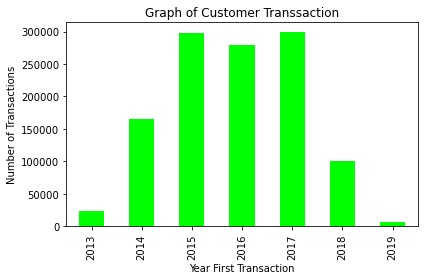

In [254]:
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x= 'Year_First_Transaction', y= 'Count_Transaction', kind= 'bar', title= 'Graph of Customer Transsaction', color= 'lime')
plt.xlabel('Year First Transaction')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

Next visualizations, we using pointplot or line chart to visualize our data. This visualizations is produced from seaborn library, which is also used for Data Visualizations.

And for the result is for Average Transactions per year, in every product is having some ups and downs in average transaction. But for the Shoes, the number is significantly constant.

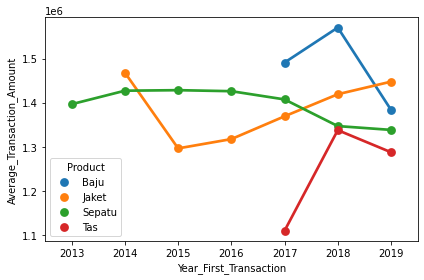

In [255]:
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),
             x= 'Year_First_Transaction',
             y= 'Average_Transaction_Amount',
             hue= 'Product')
plt.tight_layout()
plt.show()

For the visualizations is customer churn aspects, we using pie plot to visualize the data. 

First thing we have to do is pivot or count every single data that contains is_churn index. After that, we count the proportion churn by Product, and finally we draw the pie plot for every product.

And for the result is every product have a customer churn, which means the consument has stopped using the products or services already and for the range is quite big, which is around 60-68%

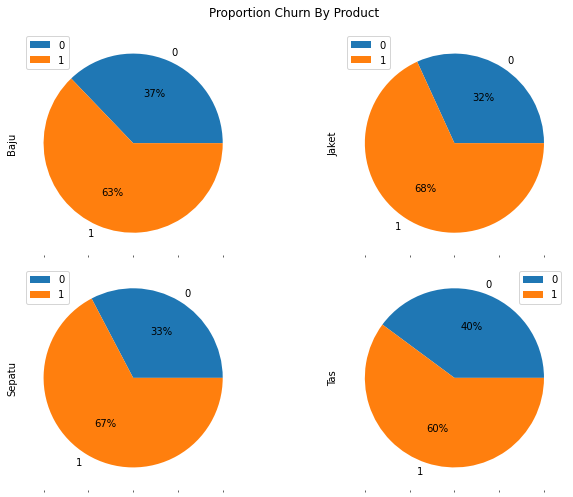

In [256]:
df_piv = df.pivot_table(index='is_churn',
                       columns='Product',
                       values='Customer_ID',
                       aggfunc='count',
                       fill_value=0)

plot_product = df_piv.count().sort_values(ascending=False).head().index

df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
               figsize=(10,7),
               layout=(-1,2),
               autopct='%1.0f%%',
               title='Proportion Churn By Product',)
plt.tight_layout()
plt.show()

The next visualization is we try to categorize the amount of transactions that already done by customers. It has a purpose to measure how many times the customer using or purchasing the products or services. We using conditional statements (if-else) to categorize every single transaction group.

And for the result is the majority of customer purchase the products only once, and for the lowest is the customer that purchase the product 7-10 times (4th category)

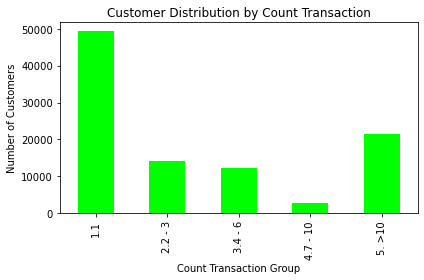

In [257]:
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1.1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val = '2.2 - 3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val = '3.4 - 6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val = '4.7 - 10'
    else:
        val = '5. >10'
    return val

df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x= 'Count_Transaction_Group', y= 'Customer_ID', kind= 'bar', title= 'Customer Distribution by Count Transaction', color= 'lime')
plt.xlabel('Count Transaction Group')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

Next, we are going to categorize every average transaction amount. With the same method and visualizations.

And for the result is for the highest average transaction is in range of > 1.000.000 until 2.500.000 (5th category)

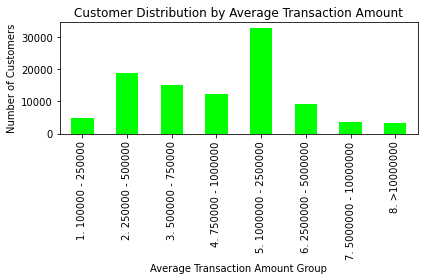

In [258]:
plt.clf()

def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <= 200000):
        val = '1. 100000 - 250000'
    elif (row['Average_Transaction_Amount'] > 250000 and row['Average_Transaction_Amount'] <= 500000):
        val = '2. 250000 - 500000'
    elif (row['Average_Transaction_Amount'] > 500000 and row['Average_Transaction_Amount'] <= 750000):
        val = '3. 500000 - 750000'
    elif (row['Average_Transaction_Amount'] > 750000 and row['Average_Transaction_Amount'] <= 1000000):
        val = '4. 750000 - 1000000'
    elif (row['Average_Transaction_Amount'] > 1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val = '5. 1000000 - 2500000'
    elif (row['Average_Transaction_Amount'] > 2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val = '6. 2500000 - 5000000'
    elif (row['Average_Transaction_Amount'] > 5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val = '7. 5000000 - 10000000'
    else:
        val = '8. >10000000'
    return val

df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x= 'Average_Transaction_Amount_Group', y= 'Customer_ID', kind= 'bar', title= 'Customer Distribution by Average Transaction Amount', color= 'lime')
plt.xlabel('Average Transaction Amount Group')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

##### Step 5 (Modelling) :

The final step of this project is modelling the data using Machine Learning method.

The first thing we need to do is deciding the feature columns for the dataset. There are 3 columns that being used for this step. For column Year_Diff, we create it by substract Year_Last_Transaction and Year_First_Transaction.

After that, we assign every columns into X and Y. X is for 3 feature columns that already established, and Y is for Churn column.

In [259]:
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

X = df[feature_columns]

y = df['is_churn']

print('Kolom Feature', X)
print('\nKolom Target', y)

Kolom Feature        Average_Transaction_Amount  Count_Transaction  Year_Diff
0                         1467681                 22          2
1                         1269337                 41          4
2                          310915                 30          2
3                          722632                 27          2
4                         1775036                 25          3
...                           ...                ...        ...
99995                      298662                  1          0
99996                      349556                  1          0
99997                      598013                  1          0
99998                     1208591                  1          0
99999                      486710                  1          0

[100000 rows x 3 columns]

Kolom Target 0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    0
Name: is_churn, Length: 100000, dtype: int32


The next step is split the data that we already assign into training and testing using train_test_split functions from sklearn.

For the percentage of the data, training data using 75% part of the entry data, and the rest is belongs to testing data, which is 25%

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

For the next steps, we create the model for our data using Linear Regression, and then we fit the model, predict and also evaluate the model that we already create using Confusion Matrix.

In short, Linear Regression is the method in Supervised Learning to estimate or predict the connection between two different variables (in this case, X and y).

In [261]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred=logreg.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


And next step is visualize the Confusion Matrix that we already built.

As you can see on the chart, there are 4 sections that represent the amount of data in every part.

1. In upper left, there is TP (True Positive), which have 1 value only
2. In upper right, there is FP (False Positive), which have 8330 values
3. In lower left, there is FN (False Negative), which have 3 values
4. In lower right, there is TN (True Negative), which have 16666 values

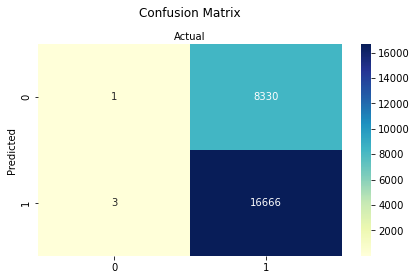

In [262]:
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix', y=1.1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()

And for the very last part, we able to measure the score for Accuracy, Precision, and Recall.

1. Accuracy is one way to assess how often model classifies a data point correctly.
2. Precision is the accuracy between the information that being asked by the user and the answer that given by the system.
3. Recall is the sucessfull rate by the system to re-obtain some informations.

And surprisingly for this project, Accuracy, Precision, and Recall score have the same values, which is about 0.66668

In [263]:
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision :', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision : 0.66668
Recall : 0.66668
